# Data Set Information

**Description:
The dataset contains information collected from an online food ordering platform over a period of time. It encompasses various attributes related to Occupation, Family Size, Feedback etc..**

#  Importing libraries and reading data

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import folium
import warnings
warnings.simplefilter(action='ignore')

In [2]:
data = pd.read_csv(r"/kaggle/input/online-food-dataset/onlinefoods.csv")

In [3]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [4]:
data=data.iloc[:,:-1]

In [5]:
categorical_columns=data.select_dtypes(include='object').columns
numerical_columns = data.select_dtypes(include='number').columns

In [6]:
for col in categorical_columns:
    data[col] = data[col].str.strip()

In [7]:
data.duplicated().sum()

data['Monthly Income'] = data['Monthly Income'].str.replace('.', '', regex=False)

data['Educational Qualifications'] = data['Educational Qualifications'].str.replace('.', '', regex=False)


# EDA

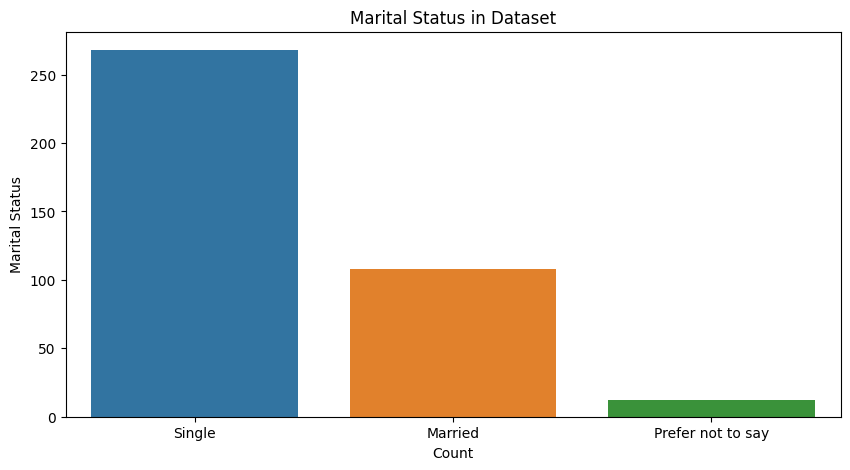

In [8]:
plt.subplots(figsize=(10, 5))
sns.countplot(data=data, x="Marital Status")
plt.title("Marital Status in Dataset")
plt.xlabel("Count")
plt.ylabel("Marital Status")
plt.show()

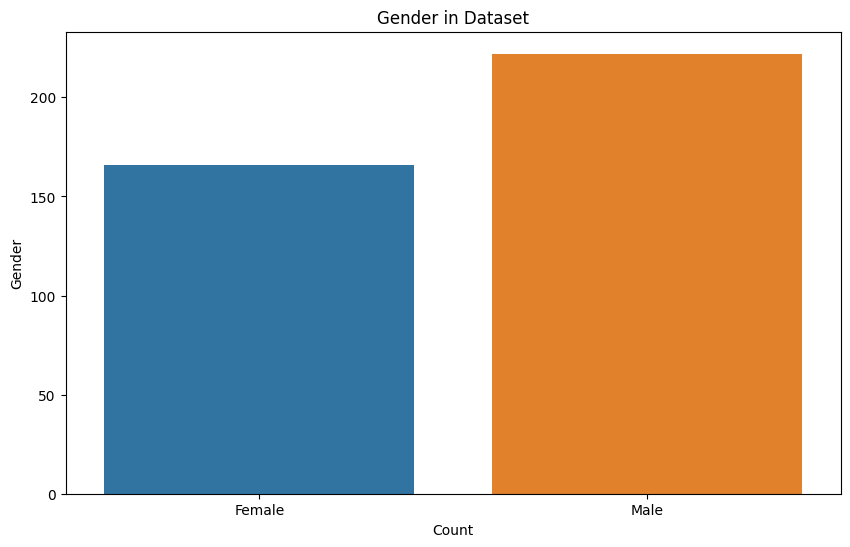

In [9]:

plt.subplots(figsize=(10,6))
sns.countplot(data = data,x="Gender")
plt.title("Gender in Dataset")
plt.xlabel("Count")
plt.ylabel("Gender")
plt.show()

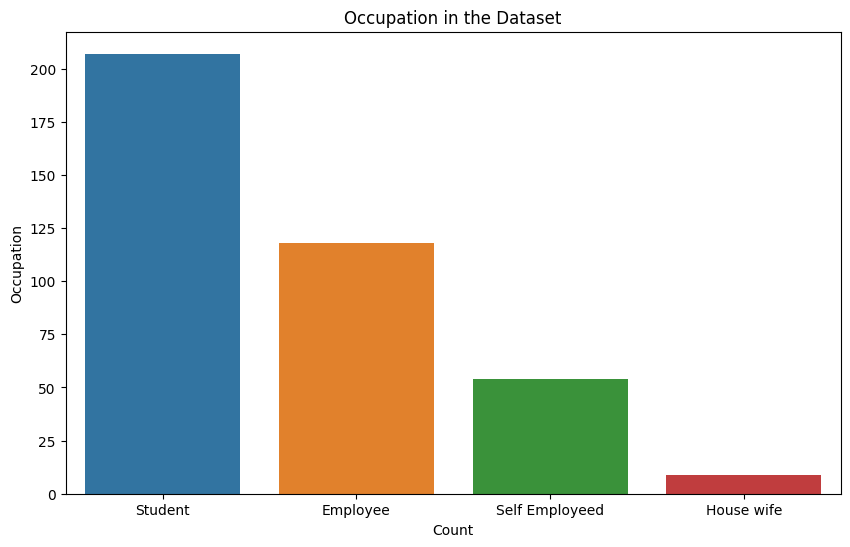

In [10]:
plt.subplots(figsize=(10,6))
sns.countplot(data = data,x="Occupation")
plt.title("Occupation in the Dataset")
plt.xlabel("Count")
plt.ylabel("Occupation")
plt.show()

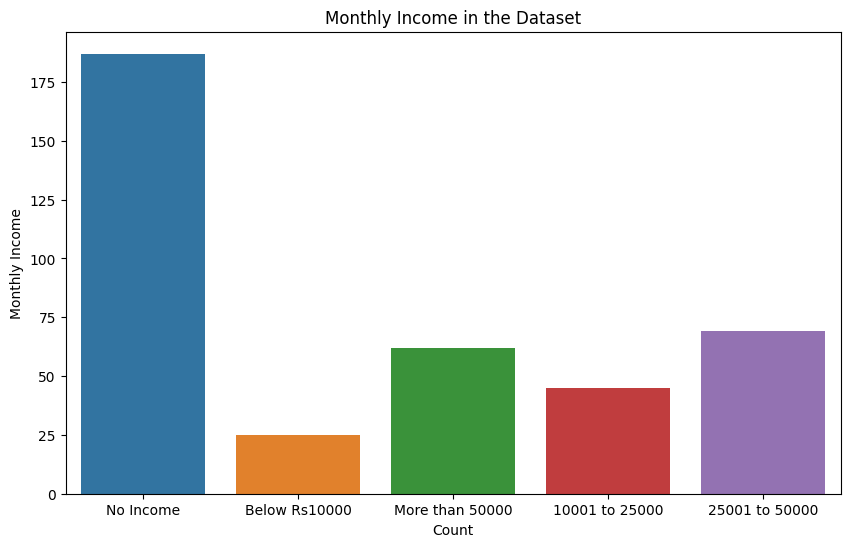

In [11]:
plt.subplots(figsize=(10,6))
sns.countplot(data = data,x="Monthly Income")
plt.title("Monthly Income in the Dataset")
plt.xlabel("Count")
plt.ylabel("Monthly Income")
plt.show()

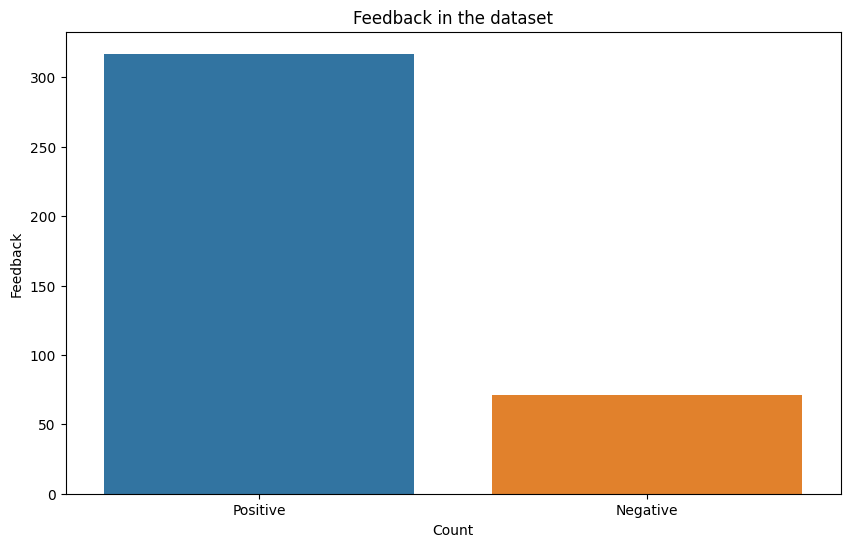

In [12]:
plt.subplots(figsize=(10,6))
sns.countplot(data = data,x="Feedback")
plt.title("Feedback in the dataset")
plt.xlabel("Count")
plt.ylabel("Feedback")
plt.show()

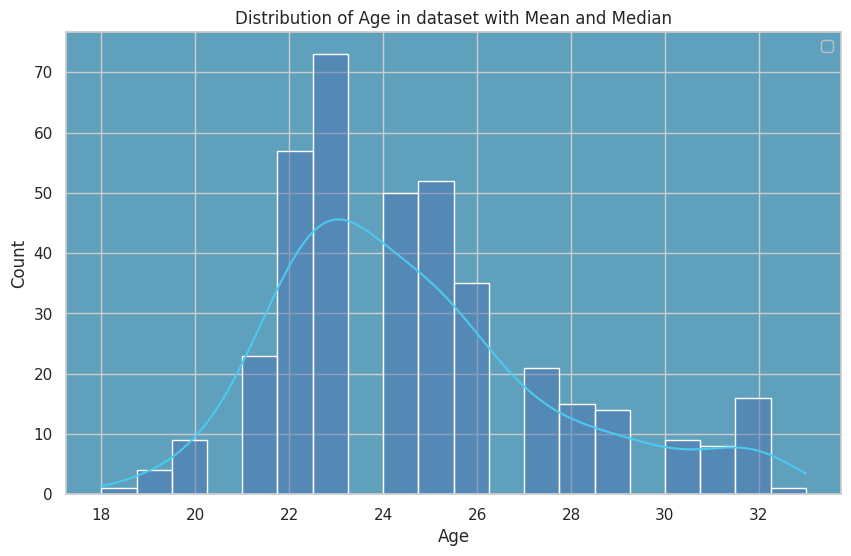

In [13]:
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#5fa1bc"})
cmap = sns.color_palette("magma", as_cmap=True)
plt.figure(figsize=(10, 6))
histplot = sns.histplot(data=data, x="Age", bins=20, palette=cmap, edgecolor='white', kde=True)
histplot.get_lines()[0].set_color("#4cc9f0")
plt.title("Distribution of Age in dataset with Mean and Median")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

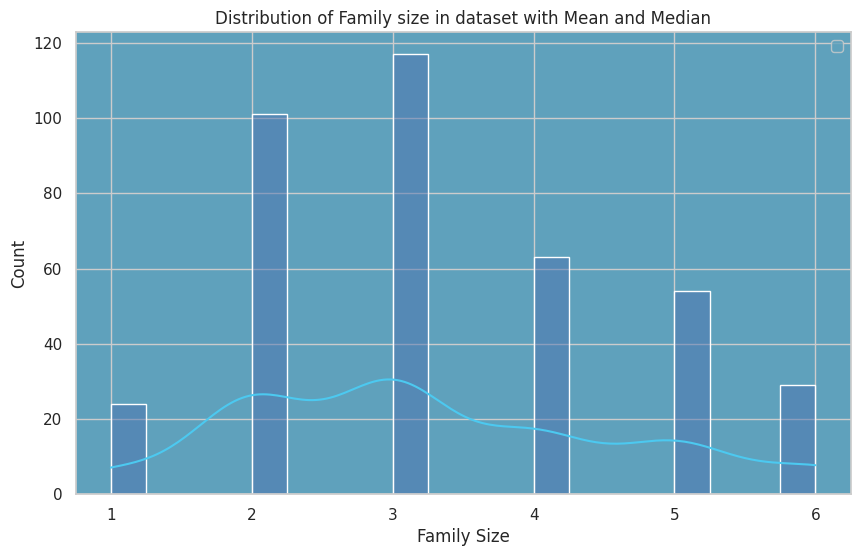

In [14]:
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#5fa1bc"})
cmap = sns.color_palette("magma", as_cmap=True)
plt.figure(figsize=(10, 6))
histplot = sns.histplot(data=data, x="Family size", bins=20, palette=cmap, edgecolor='white', kde=True)
histplot.get_lines()[0].set_color("#4cc9f0")

plt.title("Distribution of Family size in dataset with Mean and Median")
plt.xlabel("Family Size")
plt.ylabel("Count")
plt.legend()
plt.show()

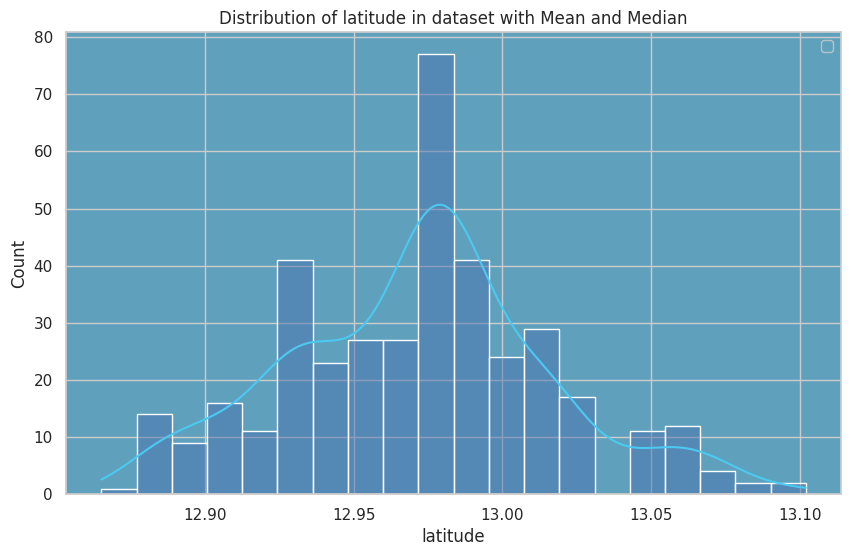

In [15]:
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#5fa1bc"})
cmap = sns.color_palette("magma", as_cmap=True)
plt.figure(figsize=(10, 6))
histplot = sns.histplot(data=data, x="latitude", bins=20, palette=cmap, edgecolor='white', kde=True)
histplot.get_lines()[0].set_color("#4cc9f0")
plt.title("Distribution of latitude in dataset with Mean and Median")
plt.xlabel("latitude")
plt.ylabel("Count")
plt.legend()
plt.show()

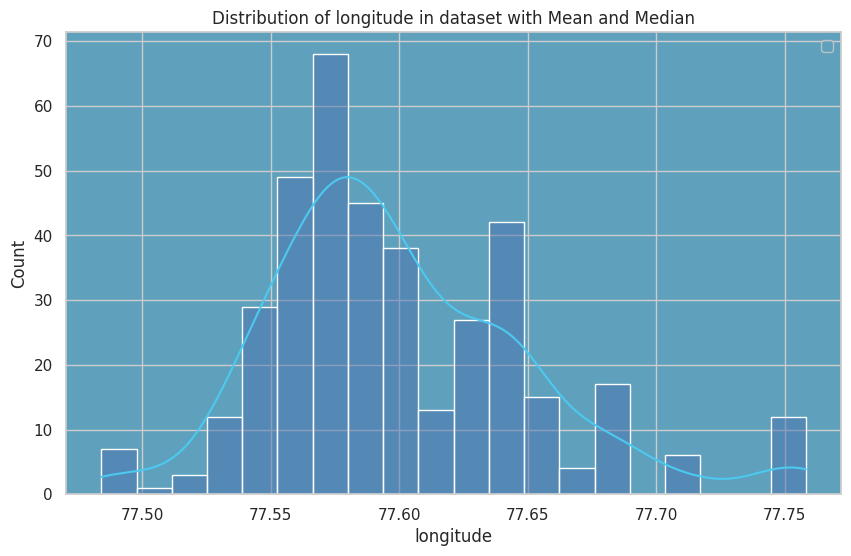

In [16]:
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#5fa1bc"})
cmap = sns.color_palette("magma", as_cmap=True)
plt.figure(figsize=(10, 6))
histplot = sns.histplot(data=data, x="longitude", bins=20, palette=cmap, edgecolor='white', kde=True)
histplot.get_lines()[0].set_color("#4cc9f0")
plt.title("Distribution of longitude in dataset with Mean and Median")
plt.xlabel("longitude")
plt.ylabel("Count")
plt.legend()
plt.show()

# visualizing each column with the feedback

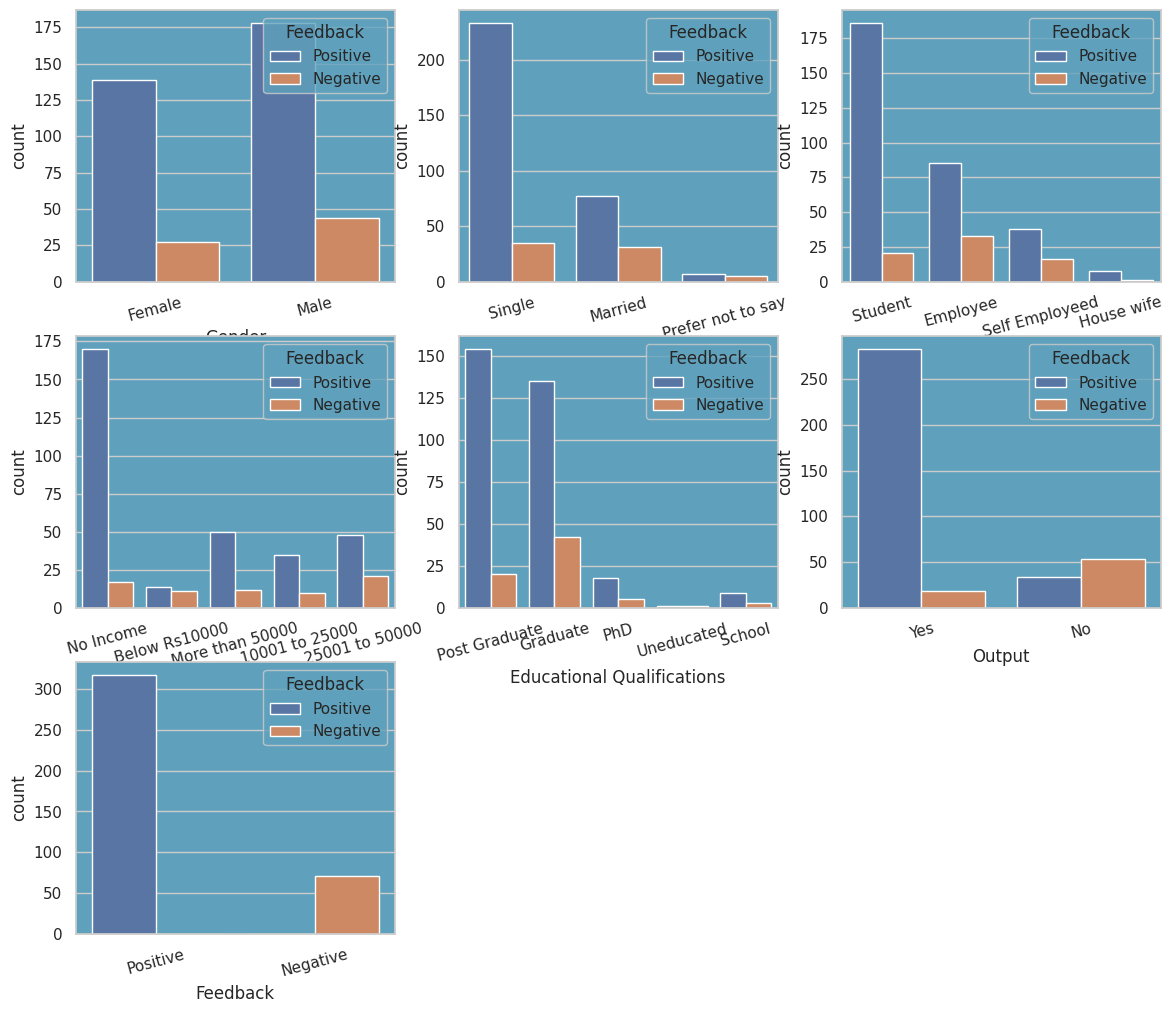

In [17]:
plt.figure(figsize=(14,12))
for i,col in enumerate(categorical_columns):
    plt.subplot(3,3,i+1)
    sns.countplot(data=data,x=col,hue="Feedback")
    plt.xticks(rotation=15)
plt.show()

# Relation between family size,age and feedback

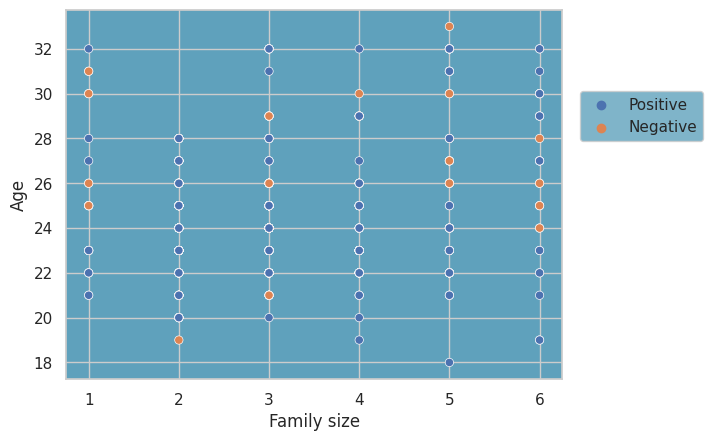

In [18]:
sns.scatterplot(data=data,x='Family size',y='Age',hue='Feedback')
plt.legend(bbox_to_anchor=(1.3,0.8))

# Average age of each gender

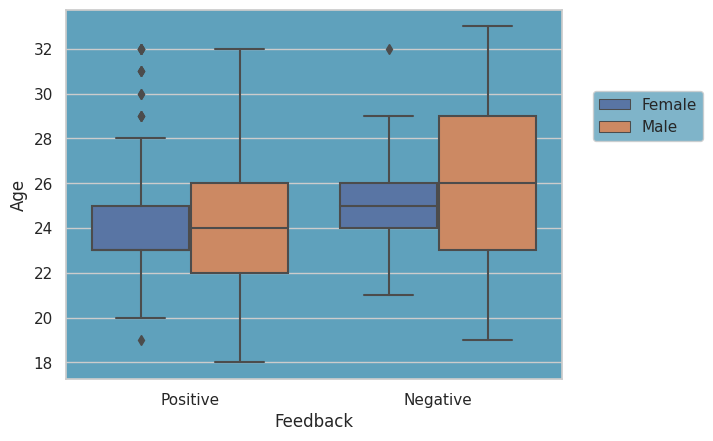

In [19]:
sns.boxplot(data = data , x=data.Feedback,y=data.Age,hue=data.Gender)
plt.legend(bbox_to_anchor = (1.3,0.8))

# Transforming data for model and importing libraries

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [21]:
data['Feedback'] =data.loc[:,'Feedback'].replace({'Positive':1,'Negative':0})

In [22]:
model_data = pd.concat([data,pd.get_dummies(data[categorical_columns[:-1]],dtype=int)],axis=1).drop(columns=categorical_columns[:-1])

In [23]:
X = model_data.drop(columns=["Feedback"])
y = model_data['Feedback']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

# Training desicion tree model and evaluating it

In [24]:
model = RandomForestClassifier()

In [25]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [26]:
model.score(X_train,y_train)

0.988929889298893

In [27]:
model.score(X_test,y_test)

0.8717948717948718

In [28]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8717948717948718
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.71      0.62        17
           1       0.95      0.90      0.92       100

    accuracy                           0.87       117
   macro avg       0.75      0.80      0.77       117
weighted avg       0.89      0.87      0.88       117



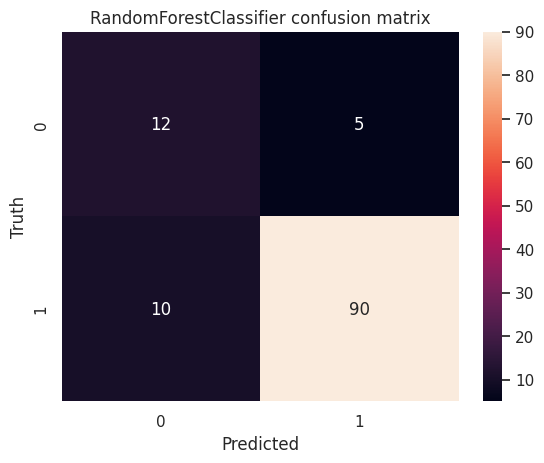

In [29]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("RandomForestClassifier confusion matrix")
plt.show()